<a href="https://colab.research.google.com/github/MasiboBrian/AirBNB-Price-Prediction/blob/master/Imagehash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np # linear algebra and arrays
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
from pathlib import Path

paths = sorted(glob.glob('all/*_2.jpg'))
print(len(paths))

imgs = [Path(p).stem.split('_')[0] for p in paths]

print(len(imgs))
print(len(set(imgs)))

import torch

10
10
10


In [ ]:
import cv2
!pip install imagehash
import imagehash
from tqdm import tqdm_notebook as tqdm
from PIL import Image

funcs = [
    imagehash.average_hash,
    #lambda x: imagehash.whash(x, mode='db4'),
]

hashes = []

for path in tqdm(paths, total=len(paths)):
    image = cv2.imread(path)
    image = Image.fromarray(image)
    hashes.append(np.array([f(image).hash for f in funcs]).reshape(64))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
# use cuda to speed up the process
hashes = torch.Tensor(np.array(hashes).astype(int))

# calculate similarity scores
sims = np.array([(hashes[i] == hashes).sum(dim=1).cpu().numpy()/256 for i in range(hashes.shape[0])])

In [ ]:
sims.shape

(10, 10)

In [ ]:
sims2 = sims.copy()
np.fill_diagonal(sims2, 0)

threshold = 0.23
duplicates = np.where(sims2 > threshold)
# duplicates = np.where((sims2 > threshold))  (sims2 < (threshold + 0.1))
print(len(duplicates[0]))

8


all/10_2.jpg
all/9_2.jpg
0.25


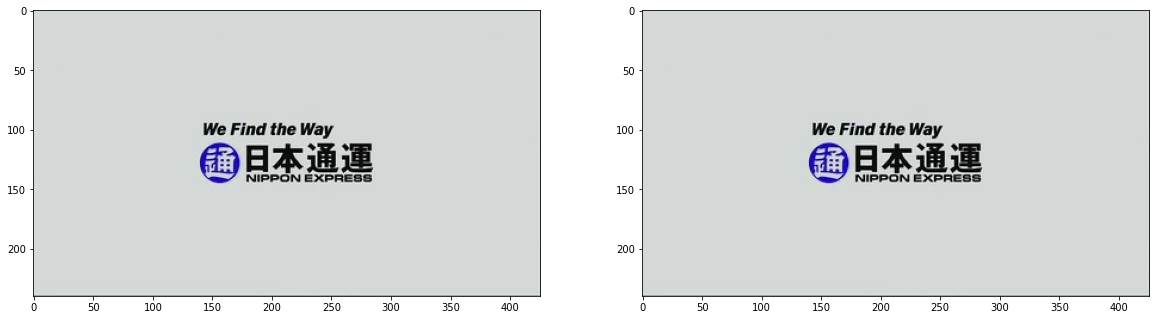

all/1_2.jpg
all/2_2.jpg
0.25


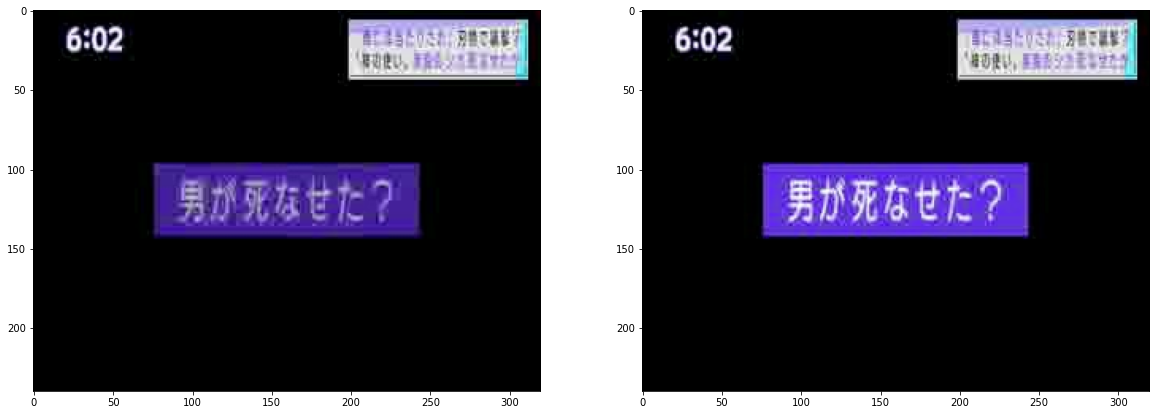

all/2_2.jpg
all/1_2.jpg
0.25


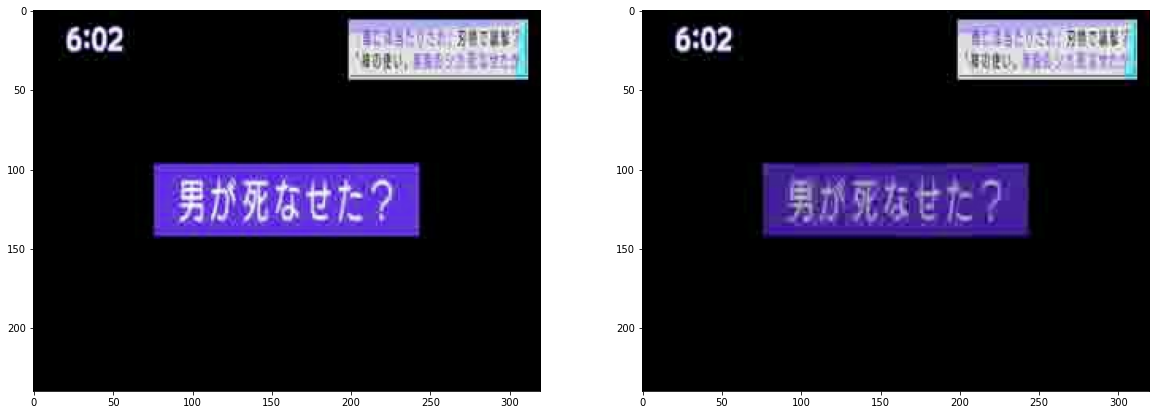

all/4_2.jpg
all/8_2.jpg
0.25


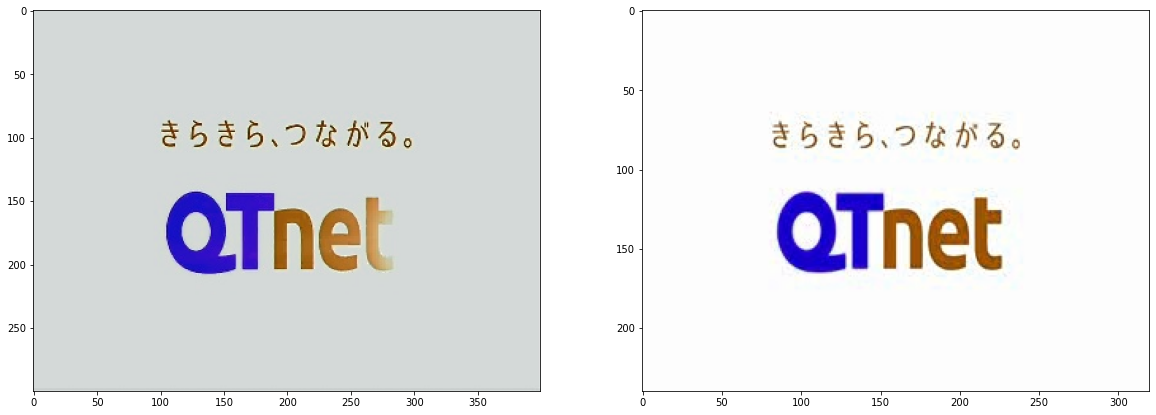

all/5_2.jpg
all/6_2.jpg
0.23828125


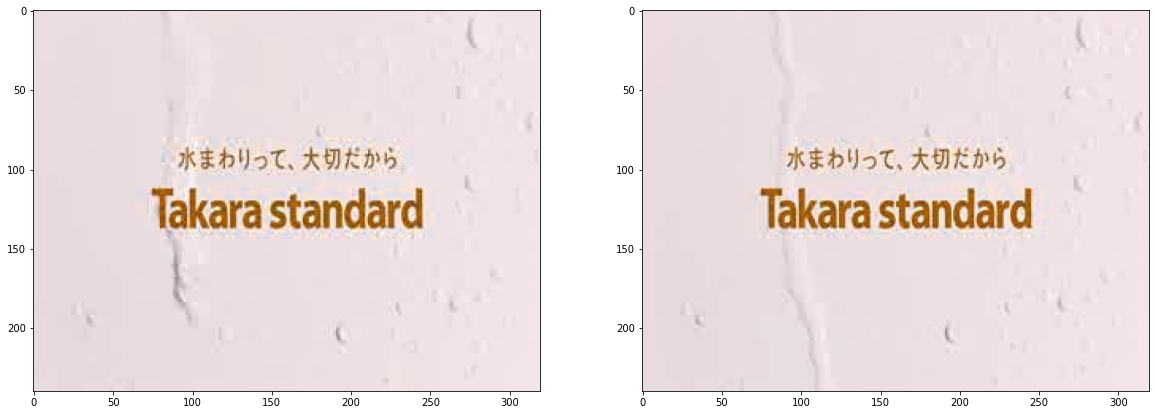

all/6_2.jpg
all/5_2.jpg
0.23828125


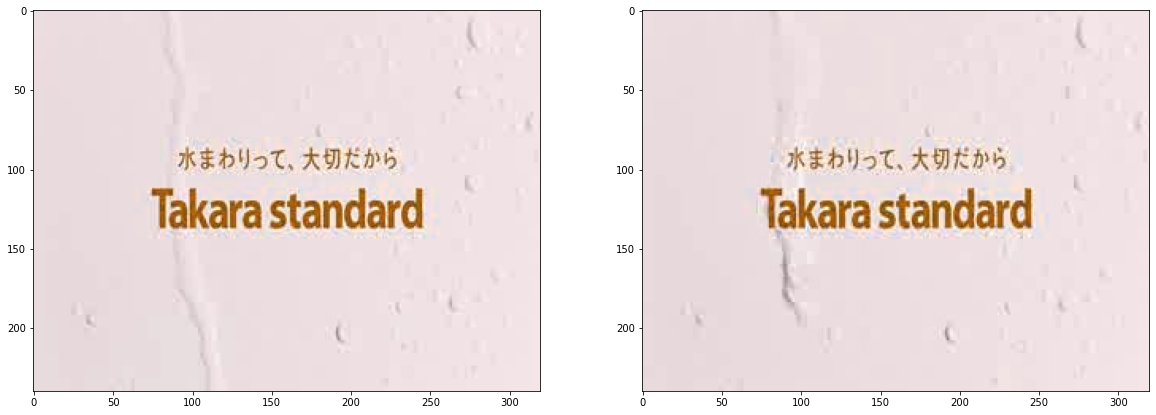

all/8_2.jpg
all/4_2.jpg
0.25


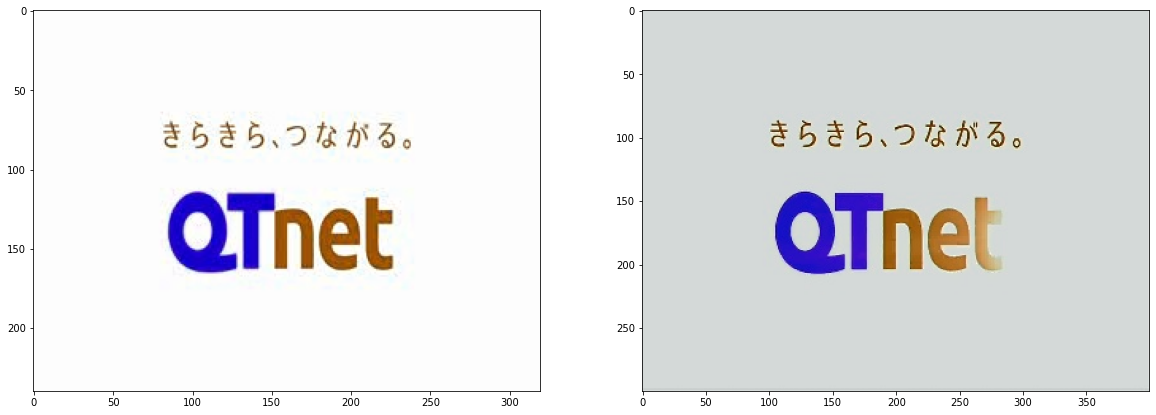

all/9_2.jpg
all/10_2.jpg
0.25


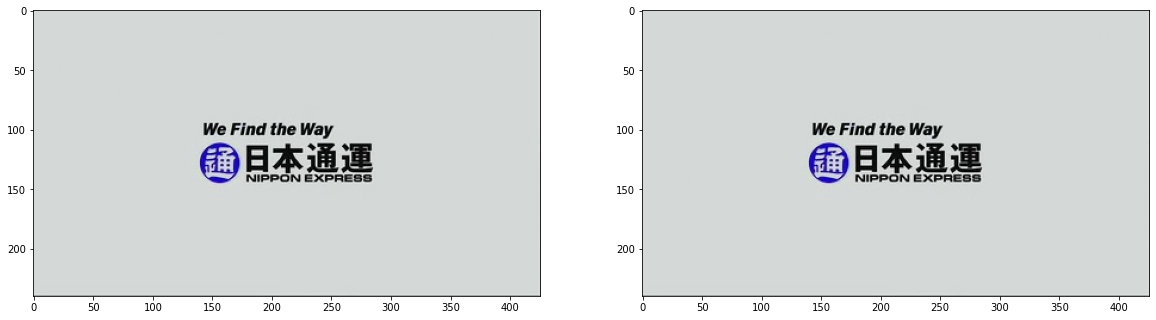

In [ ]:
p# Let's check image pairs with similarity larget than threshold.
# You can lower threshold to find more duplicates (and more false positives).

import matplotlib.pyplot as plt

count = 20
tmp = 0

pairs = {}
for i,j in zip(*duplicates):
    if i == j:
        continue

    path1 = paths[i]
    path2 = paths[j]
    print(path1)
    print(path2)
    print(sims2[i, j])

    image1 = cv2.imread(path1)
    image2 = cv2.imread(path2)

    if image1.shape[0] > image1.shape[1] / 2:
        fig,ax = plt.subplots(figsize=(20,20), ncols=2)
    elif image1.shape[1] > image1.shape[0] / 2:
        fig,ax = plt.subplots(figsize=(20,20), nrows=2)
    else:
        fig,ax = plt.subplots(figsize=(20,30), nrows=2)
    ax[0].imshow(image1)
    ax[1].imshow(image2)
    plt.show()

    tmp += 1
    if tmp > count:
        break